In [417]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
%matplotlib inline 
import copy

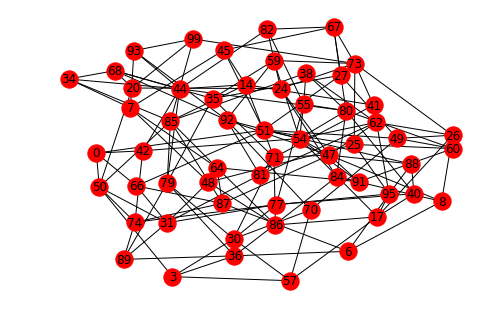

In [15]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/5.137931034482759_D_58_N3_P"
G=nx.read_edgelist(name)
# colormap = nx.greedy_color(G, strategy='saturation_largest_first')
# print(colormap)
# theorder = sorted(colormap)

# for node in colormap:
#     for adjacent_node in G[node]:
#         if colormap[node] == colormap[adjacent_node]:
#             print("no good")
    
# col = []
# for i in theorder:
#     if colormap[i] == 0:
#         col.append('c')
#     elif colormap[i] == 1:
#         col.append('m')
#     elif colormap[i] == 2:
#         col.append('b')
#     else:
#         col.append('w')

nx.draw(G, with_labels = True)
plt.show()

In [ ]:
max_col = 0
for node in mycolors:
    if mycolors[node] > max_col:
        max_col = mycolors[node]
print(max_col)

for node in mycolors:
    for adjacent_node in G[node]:
        if mycolors[node] == mycolors[adjacent_node]:
            print("no good")

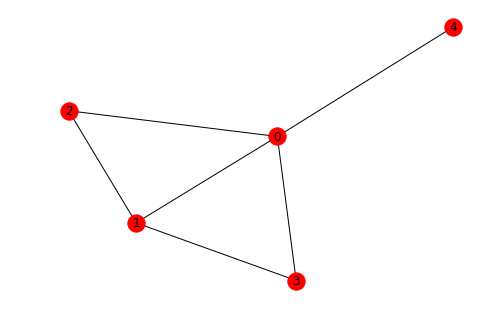

In [418]:
F = nx.Graph()
F.add_edge(0,2)
F.add_edge(0,1)
F.add_edge(0,3)
F.add_edge(0,4)
F.add_edge(1,2)
F.add_edge(1,3)

nx.draw(F,with_labels = True)
plt.show()

In [16]:
def random_options(still_to_be_colored):
    # still to be colored is een lijst met nodes die nog niet zijn ingekleurd
    i = random.randrange(len(still_to_be_colored))
    return F[i]
        

    for i in range(len(F)):
        # Compute the maximum saturation and the set of nodes that
        # achieve that saturation.
        saturation = {v: len(c) for v, c in distinct_colors.items() # om te kijken hoe hoog de saturation is
                       if v not in colors} # want als hij in colors zit is die ingekleurd
        # Yield the node with the highest saturation, and break ties by
        # degree.
        
        # Dit deel stelt vast welke nodes de hoogste saturation hebben en stopt ze in een lijst
        max_sat = 0
        for key in saturation:
            if saturation[key] > max_sat:
                max_sat = saturation[key]
        max_sat_items = []
        for key in saturation:
            if saturation[key] == max_sat:
                max_sat_items.append(key)
        max_deg = 0

        # Dit deel stelt vast welke nodes van de hoogste saturation de meeste connecties hebben en stopt
        # deze dan ook weer in een lijst
        if len(max_sat_items) > 1:
            max_sat_max_deg = []
            for item in max_sat_items:
                if max_deg < len(F[item]):
                    max_deg = len(F[item])

            for item in max_sat_items:
                if len(F[item]) == max_deg:
                    max_sat_max_deg.append(item)
            return max_sat_max_deg
        
        return max_sat_items

# for random node in G:  
#     pick node and throw in alreadypicked
#     alreadypicked = []
    


            
# print(colors)


# col = ['c', 'm', 'b', 'm', 'b'] 
# # hij kleurt in een hele gekke volgorde in: eerst 0 -> 2 -> 1 -> 3 -> 4. ?????

# nx.draw(F,node_color = col, with_labels = True)
# plt.show()


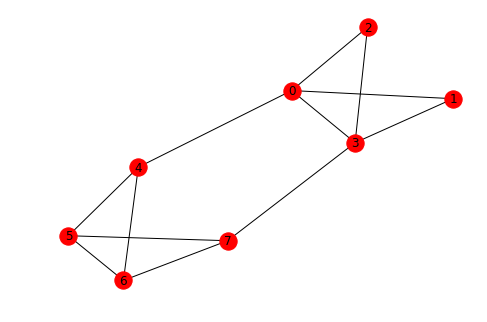

In [17]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,7)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(5,7)
G.add_edge(6,7)

nx.draw(G,with_labels = True)
plt.show()


In [ ]:
for i in range(len(G)):
    colors = {}
    stack = []
    distinct_colors = {v: set() for v in G}
    if i == 0:
        colors[0] = 0
        for v in G[0]:
            distinct_colors[v].add(0)
    choices = []
    while len(colors) != len(G):
        o = options(G, distinct_colors, colors)
        if len(o) > 1:
            choices.append(o)
        for item in o:
            stack.append(item)
        v = stack.pop()
        for color in range(3):
            if len(distinct_colors[v]) == 3:
                last_choice = choices.pop()
                for c_nodes in last_choice:
                    if c_nodes in colors:
                        # POP ALLE KEYS DIE TOEGEVOEGD ZIJN NA DEZE NODE. 
            elif color not in distinct_colors[v]:
                colors[v] = color
                for neighbour in G[v]:
                    distinct_colors[neighbour].add(color)
                break



In [8]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/9.24_D_100_N5_P"
G=nx.read_edgelist(name)

In [ ]:
def DFS_order_Brelaz(G, k):
    colors = {}

    distinct_colors = {v: set() for v in G}

    stack = []
    d_stack = []
    
    nodes = options(G, distinct_colors, colors)
    for node in nodes:
        colors_2 = copy.deepcopy(colors)
        distinct_colors_2 = copy.deepcopy(distinct_colors)
        for color in range(k):  
            if color not in distinct_colors_2[node]:
                colors_2[node] = color
                for neighbour in G[node]:
                    distinct_colors_2[neighbour].add(color)
                stack.append(colors_2)
                d_stack.append(distinct_colors_2)
                break
                    
    while stack:
        print(stack)
        colors_1 = stack.pop()
        distinct_colors = d_stack.pop()
        nodes = options(G, distinct_colors, colors_1)
        for node in nodes:
            colors_2 = copy.deepcopy(colors_1)
            distinct_colors_2 = copy.deepcopy(distinct_colors)
            for color in range(k):  
                if color not in distinct_colors_2[node]:
                    colors_2[node] = color
                    for neighbour in G[node]:
                        distinct_colors_2[neighbour].add(color)
                    stack.append(colors_2)
                    d_stack.append(distinct_colors_2)
                    break
    
    if len(colors_1) == len(G):
        return colors_1
    
    print(colors_1)
    if stack == [] and len(colors_1) != len(G):
        return "No solution"
    
    
DFS_order_Brelaz(G, 4)

In [19]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/9.24_D_100_N5_P"
G=nx.read_edgelist(name)

In [52]:
import time
def DFS_color_Brelaz(G, k):
    start = time.time()
    colors = {}

    distinct_colors = {v: set() for v in G}

    stack = []
    d_stack = []
    visited = []
    steps = 0
    brelaz_steps = 0
    
    nodes = options(G, distinct_colors, colors)
    for node in nodes:
        brelaz_steps += 1
        for color in range(k):
            colors_2 = copy.deepcopy(colors)
            if color not in distinct_colors[node]:
                distinct_colors_2 = copy.deepcopy(distinct_colors)
                colors_2[node] = color
                for neighbour in G[node]:
                    distinct_colors_2[neighbour].add(color)
                stack.append(colors_2)
                d_stack.append(distinct_colors_2)
                    
    while stack:
        colors_1 = stack.pop()
        steps += 1

        if colors_1 in visited:
            continue
        if steps > 150000 and len(colors_1) != len(G):
            end = time.time()
            runtime = (end - start)
            return {}, steps, runtime 
        visited.append(colors_1)
        if len(colors_1) == len(G):
            end = time.time()
            runtime = (end - start)
            return colors_1, steps, runtime
        distinct_colors = d_stack.pop()
        nodes = options(G, distinct_colors, colors_1)
        for node in nodes:
            brelaz_steps += 1
            for color in range(k): 
                colors_2 = copy.deepcopy(colors_1)
                if color not in distinct_colors[node]:
                    distinct_colors_2 = copy.deepcopy(distinct_colors)
                    colors_2[node] = color
                    for neighbour in G[node]:
                        distinct_colors_2[neighbour].add(color)
                    stack.append(colors_2)
                    d_stack.append(distinct_colors_2)
    
    
    if len(colors_1) == len(G):
        end = time.time()
        runtime = (end - start)
        return colors_1, steps, runtime
    
    if stack == [] and len(colors_1) != len(G):
        end = time.time()
        runtime = (end - start)
        return {}, steps, runtime

In [2]:
import os
import json
def split_filename(filename):
    parts = filename.split('_')
    degree = parts[0]
    nodes = parts[2] 
    p = parts[3][1]
    
    return degree, nodes, p

for filename in os.listdir("4K_graphs"):
    degree, nodes, p = split_filename(filename)
    name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/" + str(filename)
    G=nx.read_edgelist(name)
    colorlist, steps, runtime = DFS_color_Brelaz(G, 4)
    
    data = {
        "degree": degree,
        "nodes": nodes,
        "p": p,
        "colorlist": colorlist,
        "steps": steps,
        "runtime":runtime
    }
    
    with open('coloured_4K_graphs.json', 'a') as outfile:
        json.dump(data, outfile, indent=2)

NameError: name 'nx' is not defined

In [297]:
DFS_order_Brelaz(G, 4)

NameError: name 'DFS_order_Brelaz' is not defined

In [21]:
count = 0
with open('coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        count+=1

print(count)

770


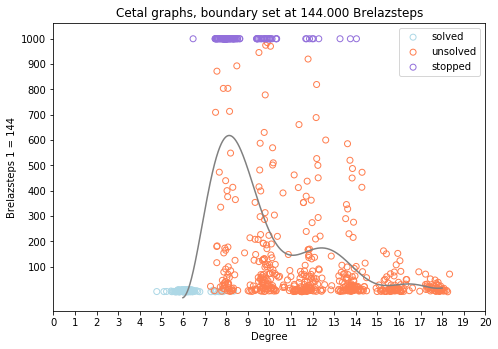

In [442]:
solved_degree = []
solved_brelazsteps = []
unsolved_degree = []
unsolved_brelazsteps = []
unsolved_stopped_degree = []
unsolved_stopped_brelazsteps = []

degree = []
with open('Brelazsteps_all_cliques_coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        degree.append(entry["degree"])
        
    
degree = sorted(degree)

with open('Brelazsteps_all_cliques_coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for con in degree:
        for entry in data:
            if entry["degree"] == con:
                if entry["colorlist"] == {}:
                    if entry["brelazsteps"] > 144000:
                        unsolved_stopped_degree.append(float(entry["degree"]))
                        unsolved_stopped_brelazsteps.append(entry["brelazsteps"]/144)
                        break
                    else:
                        unsolved_degree.append(float(entry["degree"]))
                        unsolved_brelazsteps.append(entry["brelazsteps"]/144)
                        break
                else:
                    solved_degree.append(float(entry["degree"]))
                    solved_brelazsteps.append(entry["brelazsteps"]/144)
                    break

xx = unsolved_degree + solved_degree + unsolved_stopped_degree
yy = unsolved_brelazsteps + solved_brelazsteps + unsolved_stopped_brelazsteps

import plotly.express as px

# df = px.data.gapminder().query("year == 2007")

mymodel = np.poly1d(np.polyfit(xx, yy,11))

myline = np.linspace(6, 18, 1000)
      
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(solved_degree, solved_brelazsteps, facecolors='none', edgecolors='lightblue', label='solved') #solved
ax.scatter(unsolved_degree, unsolved_brelazsteps, facecolors='none', edgecolors='coral', label='unsolved') #unsolved
ax.scatter(unsolved_stopped_degree, unsolved_stopped_brelazsteps, facecolors='none', edgecolors='mediumpurple', label='stopped')
ax.set_xlabel('Degree')
ax.set_ylabel('Brelazsteps 1 = 144')
ax.set_xlim(0, 7)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.yticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
# ax.set_title('scatter plot')

# z = np.polynomial.polynomial.polyfit(xx, yy, 1)
# p = np.poly1d(z)
plt.plot(myline,mymodel(myline),"-", color='gray')
plt.title("Cetal graphs, boundary set at 144.000 Brelazsteps")
ax.legend()

plt.show()

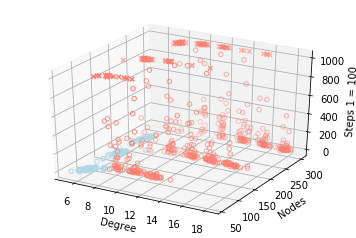

In [347]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

solved_degree = []
solved_brelazsteps = []
solved_nodes = []

unsolved_degree = []
unsolved_brelazsteps = []
unsolved_nodes = []

unsolved_stopped_degree = []
unsolved_stopped_brelazsteps = []
unsolved_stopped_nodes = []

with open('QUICK_coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        if entry["colorlist"] == {}:
            if entry["steps"] > 100000:
                unsolved_stopped_degree.append(float(entry["degree"]))
                unsolved_stopped_brelazsteps.append(entry["steps"]/100)
                unsolved_stopped_nodes.append(int(entry["nodes"]))
            else:
                unsolved_degree.append(float(entry["degree"]))
                unsolved_brelazsteps.append(entry["steps"]/100)
                unsolved_nodes.append(int(entry["nodes"]))
        else:
            solved_degree.append(float(entry["degree"]))
            solved_brelazsteps.append(entry["steps"]/100)
            solved_nodes.append(int(entry["nodes"]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alldegree = solved_degree + unsolved_degree + unsolved_stopped_degree
allsteps = solved_brelazsteps + unsolved_brelazsteps + unsolved_stopped_brelazsteps
allnodes = solved_nodes + unsolved_nodes + unsolved_stopped_nodes


ax.scatter(unsolved_degree, unsolved_nodes, unsolved_brelazsteps, facecolors='none', edgecolors='salmon') #unsolved
ax.scatter(unsolved_stopped_degree, unsolved_stopped_nodes, unsolved_stopped_brelazsteps, color='salmon', marker='x')
ax.scatter(solved_degree, solved_nodes, solved_brelazsteps, facecolors='none', edgecolors='lightblue') #solved

ax.set_xlabel('Degree')
ax.set_zlabel('Steps 1 = 100')
ax.set_ylabel('Nodes')

plt.show()

In [296]:
import plotly.graph_objects as go

import plotly.express as px

fig = px.scatter_3d([go.Scatter3d(x=alldegree, y=allnodes, z=allsteps,
                                   mode='markers')], x=alldegree, y=allnodes, z=allsteps)
# fig.update_layout(title='Scatterplot', autosize=True,
#                   width=1000, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

fig.update_layout(scene = dict(
                    xaxis_title='Degree',
                    yaxis_title='Nodes',
                    zaxis_title='Steps'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()
# z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
# fig = go.Figure(data=[go.Surface(z=allnodes, x=alldegree, y=allsteps)])
# fig.update_layout(title='Mt Bruno Elevation', autosize=True,
#                   width=1000, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.show()

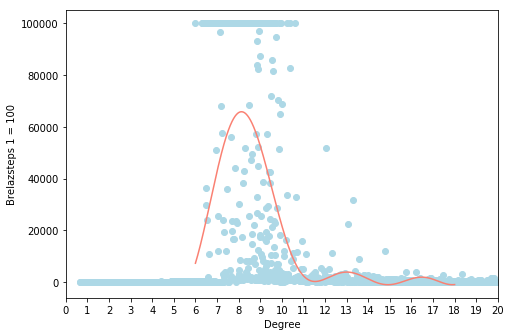

In [344]:
def p(x):
    return x**4 - 4*x**2 + 3*x

import numpy as np
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

degree = {}
with open('4K_coloured_random_graphs.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        degree[float(entry["degree"])] = entry["steps"]
    
order = sorted(degree)
steps = []

for item in order:
    steps.append(degree[item])
    
    
mymodel = np.poly1d(np.polyfit(order, steps,15))

myline = np.linspace(6, 18, 1000)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(order, steps, color='lightblue') #solved
ax.set_xlabel('Degree')
ax.set_ylabel('Brelazsteps 1 = 100')
ax.set_xlim(0, 20)
# ax.tick_params(axis ='both', which ='both', length = 0)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]) 
plt.plot(myline,mymodel(myline),"-", color='salmon')
plt.show()

In [224]:
totalcount = 0
count = 0
with open('QUICK_coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        totalcount+=1
        if entry["colorlist"] == {}:
            count+=1

print(count)
print(totalcount - count)

623
156


In [237]:
unsolveddict = {}
solveddict = {}

with open('QUICK_coloured_4K_graphs_DFS_Brelaz.json') as json_file:
    data = json.loads(json_file.read())
    for entry in data:
        if entry["colorlist"] == {}:
            if round(float(entry["degree"])) in unsolveddict:
                unsolveddict[round(float(entry["degree"]))] += 1
            else:
                unsolveddict[round(float(entry["degree"]))] = 1
        else:
            if round(float(entry["degree"])) in solveddict:
                solveddict[round(float(entry["degree"]))] += 1
            else:
                solveddict[round(float(entry["degree"]))] = 1

print(unsolveddict)
print(sorted(unsolveddict))
print(solveddict)

# 7-8 daar zit ongeveer het halfway point waar de helft kan worden opgelost en de helft niet

{12: 98, 16: 54, 8: 123, 10: 117, 13: 28, 14: 67, 11: 25, 17: 14, 18: 34, 7: 8, 9: 27, 15: 28}
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
{6: 134, 7: 15, 8: 5, 9: 1, 5: 1}


In [247]:
# probleempje: Door waarschijnlijk de merge stappen worden dus wel grafen gemaakt die niet opgelost kunnen worden.
# klopt er dan toch iets niet? Ik wil een keertje proberen om graphs te maken zonder deze stap en dan te kijken of 
# er andere resultaten uitkomen. 

temp = {
  "degree": "3.6",
  "nodes": "5",
  "p": "2",
  "colorlist": {},
  "brelazsteps": 80,
  "steps": 56,
  "runtime": 0.004804849624633789
}

# name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/18.213333333333335_D_300_N9_P"
# G=nx.read_edgelist(name)
# nx.draw(G, with_labels = True)
# plt.show()